In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,Input

In [ ]:
#To ensure the GPU is present
pysical_devices = tf.config.experimental.list_physical_devices("GPU")
if len(pysical_devices) > 0:
    #To ensure the GPU is present
    pysical_devices = tf.config.experimental.list_physical_devices("GPU")
    if len(pysical_devices) > 0:
        tf.config.experimental.set_memory_growth(pysical_devices[0],True)
        print("GPU is Used")
    else:
        print("GPU is Unavailable!")

GPU is Used


In [ ]:
#Load and explore the dataset
train_dir ='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [ ]:
#List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

#Display the class names
print(f'Number of classes: {num_classes}')
print(f'Class names: {classes}')




FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'

In [ ]:
!pip install kagglehub

import kagglehub
import os

# Download latest version and specify extraction path
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Define data directories using the downloaded path
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of classes: {num_classes}')
print(f'Class names: {classes}')


Number of classes: 2
Class names: ['nofire', 'fire']


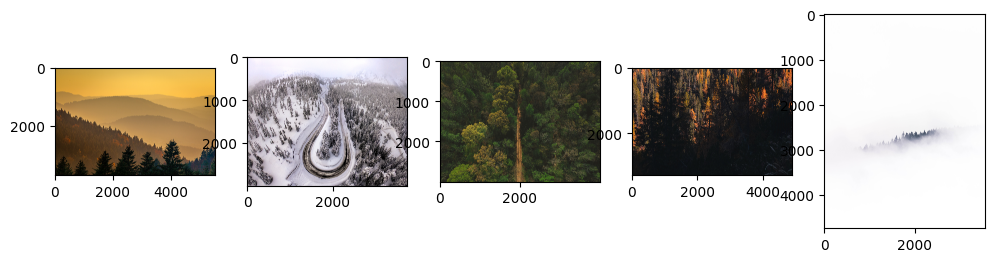

In [ ]:
#let's vis(ualize the image in the dataset
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and assign it to plt

plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)

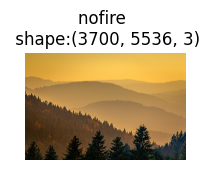

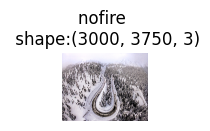

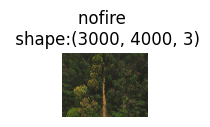

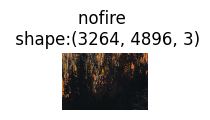

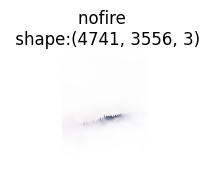

In [ ]:
#let's vis(ualize the image in the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape:{img.shape}')
  plt.axis('off')
  plt.show()

In [3]:
#Preprocessing
#Image dimensions and batch size
img_width,img_height=150,150
batch_size=32 #there willbe  32 images in batch!

#Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data generators
train_datagen=ImageDataGenerator(rescale=1./225)
val_datagen=ImageDataGenerator(rescale=1./225)
test_datagen=ImageDataGenerator(rescale=1./225)

#Preprocessing
#Image dimensions and batch size
img_width,img_height=150,150
batch_size=32 #there willbe  32 images in batch!

#Data generators
train_datagen=ImageDataGenerator(rescale=1./225)
val_datagen=ImageDataGenerator(rescale=1./225)
test_datagen=ImageDataGenerator(rescale=1./225)

# Define train_dir, val_dir, and test_dir before using them
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Update train_dir to the actual location of the downloaded data
# Assuming the dataset is extracted to 'the_wildfire_dataset_2n_version' within the downloaded path
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [4]:
#Map the indicates
class_mapping = train_generator.class_indices # Corrected the variable name to 'train_generator'
#print(class_map)
#Extract the class names
class_names = list(class_mapping.keys())
print("class Name:",class_names)

class Name: ['fire', 'nofire']


In [11]:
#let's build the CNN Model
model=Sequential([
Input(shape=(img_width,img_height,3)),
Conv2D(32,(34,3),activation='relu'),
MaxPooling2D(pool_size=(2,2)),

Conv2D(64,(3,3),activation='relu'),
MaxPooling2D(pool_size=(2,2)),

Conv2D(128,(3,3),activation='relu'),
MaxPooling2D(pool_size=(2,2)),

Flatten(),
Dense(512,activation='relu'),
Dropout(0.5),
Dense(1,activation='sigmoid')
]
)